### Preparing the tools
* For data analysis and manipulation we are going to use pandas, numpy and Matplotlib.
* For Model training and evaluation we are going to use Scikit-Learn's relevant packages.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Sciket-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score 
from sklearn.metrics import RocCurveDisplay

# Mdoel export/saving
import pickle

## Load data

In [2]:
df = pd.read_csv("..\data\heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# Find out how many of each class are there in the target, that is, how many have the disease or not.

df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

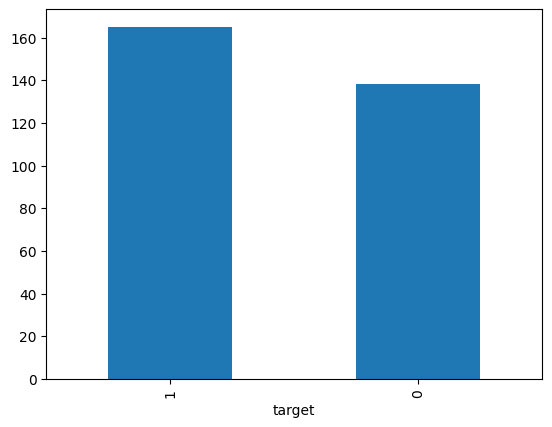

In [4]:
# Plot the values to get better visual representation

df["target"].value_counts().plot(kind='bar')

In [5]:
#Get information related to columns like data types, null values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Check the count of NAN values for each column.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Generate descriptive statistics of each column data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [8]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

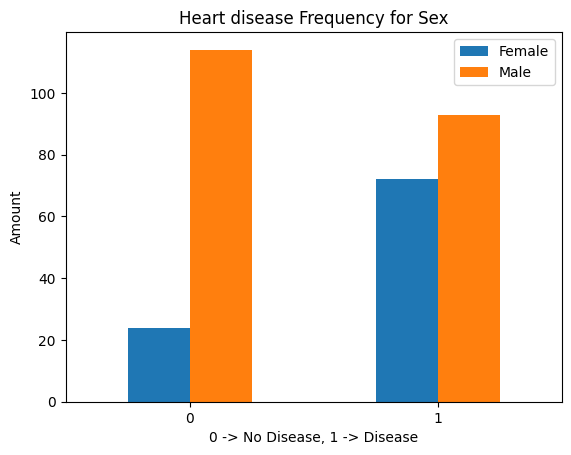

In [9]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar')
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0 -> No Disease, 1 -> Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0)

### Age vs. Max Heart Rate for Heart Disease

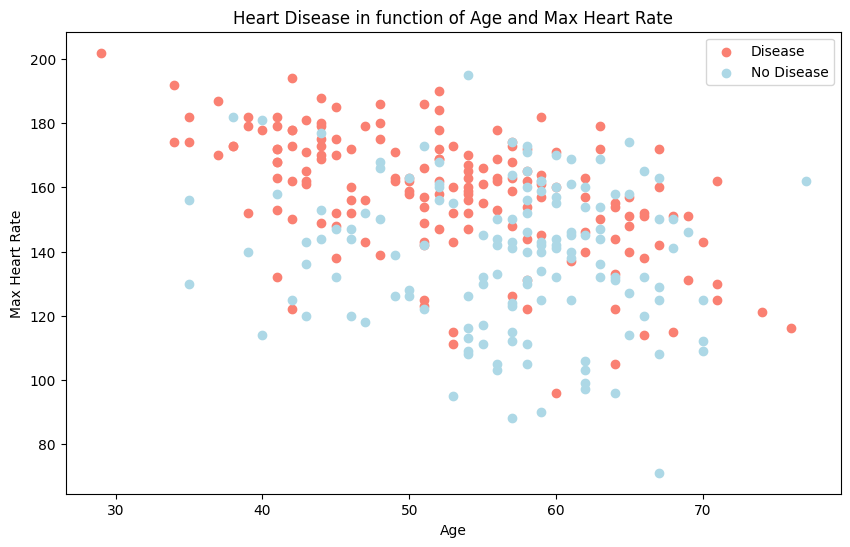

In [10]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with postive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c="lightblue");

# ADd some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

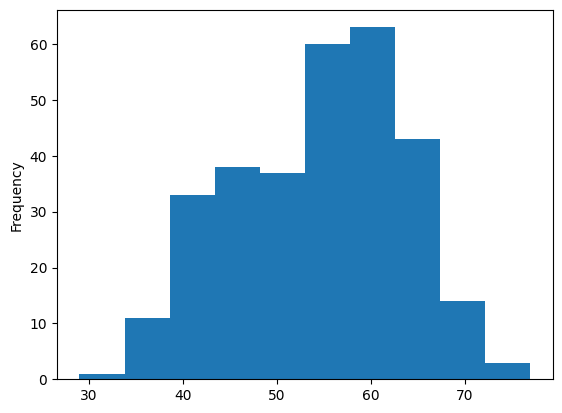

In [11]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

In [12]:
# Compare cp and target
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


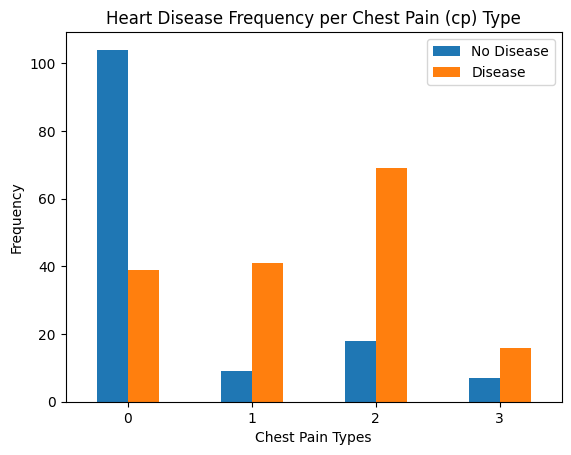

In [13]:
# Plot cp vs target 
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.title("Heart Disease Frequency per Chest Pain (cp) Type")
plt.xlabel("Chest Pain Types")
plt.ylabel("Frequency")
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

### Compare independent variables with the dependent variable using correlation.

In [14]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


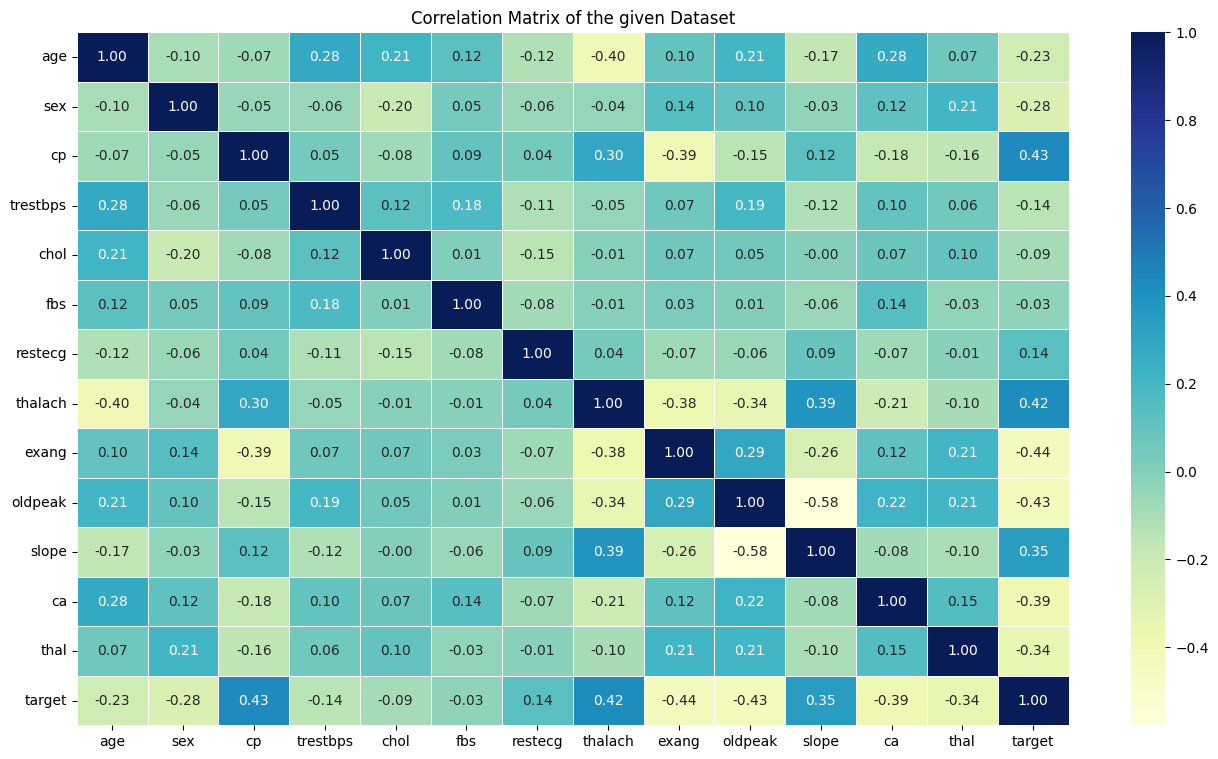

In [15]:
# Display correlation matrix using heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16,9))
plt.title("Correlation Matrix of the given Dataset")
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modelling

In [16]:
# Split data into X (Feauters) and y (Target)
X = df.drop(["target"], axis=1)
y = df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [17]:
# Split data into train and test sets.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

### Standardize the feature columns for better prediction

In [18]:
# Setup standard scaler instance
scaler = StandardScaler()

# Transform the X_train data 
X_train_transformed = scaler.fit_transform(X_train)

# Apply same transformation to X_test
X_test_transformed = scaler.transform(X_test)

## Train Machine Learning Models

Models:
1. Logistic Regression Model.
2. K-Nearest Neighbours Classifier Model.
3. Random Forest Classifier Model.

In [19]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """ 
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictionary to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [20]:
# Get the socres of the models
model_scores = fit_and_score(models = models,
                             X_train=X_train_transformed,
                             X_test=X_test_transformed,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8360655737704918}

## Compare Model Scores Using Bar Graph

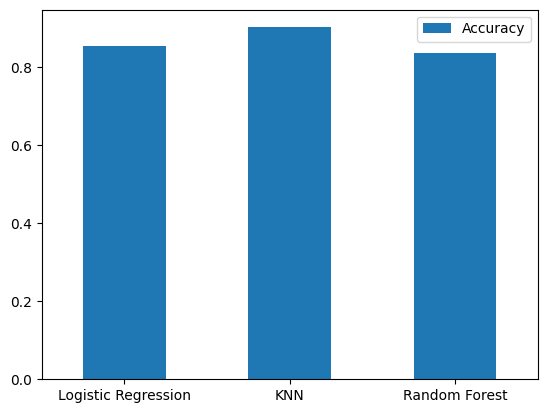

In [21]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot(kind='bar')
plt.xticks(rotation=0);

### Hyperparameter Tuning

In [22]:
# Tune the Hyperparameters of K-Nearest Neighbour Classifier Model
# There is only parameter n-neighbors for KNN model to tune

# Define Lists to take training scores and test scores to compare at different parameters
train_scores = []
test_scores = []

# Define a range of values for n-neighbor parameter
neighbor = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()
# Use loop to get different scores at different n-neighbor value
for i in neighbor:
    # Tune the parameter
    knn.set_params(n_neighbors=i)

    # Fit the data to train the model
    knn.fit(X_train_transformed, y_train)
    
    # Append the train score
    train_scores.append(knn.score(X_train_transformed, y_train))

    # Append the test score
    test_scores.append(knn.score(X_test_transformed, y_test))

Maximum KNN Score on test data is 91.80% at n_neighbor value: 7


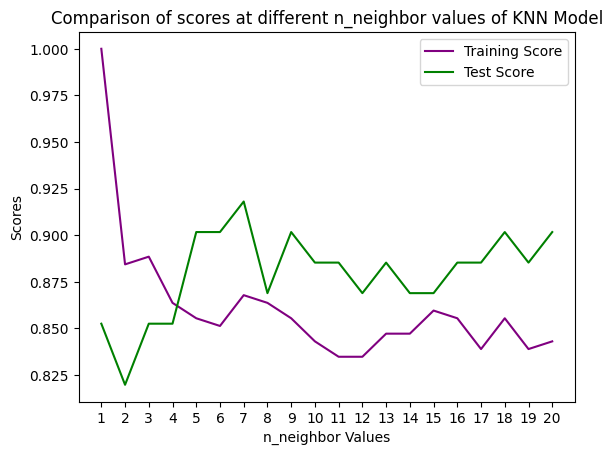

In [23]:
# Plot the scores against the same neighbor to find a neighbor value where model scored best
plt.title("Comparison of scores at different n_neighbor values of KNN Model")
plt.plot(neighbor, train_scores, label="Training Score", color='Purple')
plt.xticks(np.arange(1,21,1))
plt.plot(neighbor, test_scores, label="Test Score", color='Green')
plt.xlabel("n_neighbor Values")
plt.ylabel("Scores")
plt.legend()
print(f"Maximum KNN Score on test data is {max(test_scores)*100:.2f}% at n_neighbor value: {test_scores.index(max(test_scores))+1}")

### Hyperparameter tuning using RandomizedSearchCV
Models:
* LogisticRegression()
* RandomForestClassifier()

In [24]:
# Create a hyperparameter grid for LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier Model
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [25]:
# Use RandomizedSearchCV to tune the hyperparameters

# Setup a random seed
np.random.seed(42)

#Tune LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose = True)

# Fit the RandomizedSearchCV Model with the training data
rs_log_reg.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [26]:
rs_log_reg.score(X_test_transformed, y_test)

0.8524590163934426

In [27]:
# Tune the hyperparameters of RandomForestClassifier

# Setup a random seed
np.random.seed(42)

# Setup Random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=10,
                           verbose=True)

# Fit the RandomizedSearchCV Model with the training data
rs_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,10
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [28]:
rs_rf.best_params_

{'n_estimators': np.int64(310),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [29]:
rs_rf.score(X_test_transformed, y_test)

0.8688524590163934

### Tune hyperparameters of LogisticRegression model using GridSearchCV

In [30]:
# Define grid of parameters
param_grid = {'penalty':['l1','l2'],
              'C' : np.logspace(-4,4,30),
              'solver': ['liblinear','saga'],
              'max_iter'  : [100,1000, 2500, 5000]
}

In [31]:
# Setup reandom seed
np.random.seed(42)

# Setup GridSearchCV to find best estimator of LogisticRegression Model
gs_log = GridSearchCV(LogisticRegression(),
                      param_grid=param_grid,
                      cv = 5,
                      verbose = True,
                      n_jobs=-1)

# Fit the data into GridSearchCV Model
gs_log.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'max_iter': [100, 1000, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [32]:
gs_log.best_params_

{'C': np.float64(0.01610262027560939),
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [33]:
gs_log.score(X_test_transformed, y_test)

0.8852459016393442

### Evaluate tuned machine learning classifier, beyond accuracy using:
* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score 

In [34]:
# Make predictions using tuned model (LogisticRegression)
y_preds = gs_log.predict(X_test_transformed)

In [35]:
y_preds 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

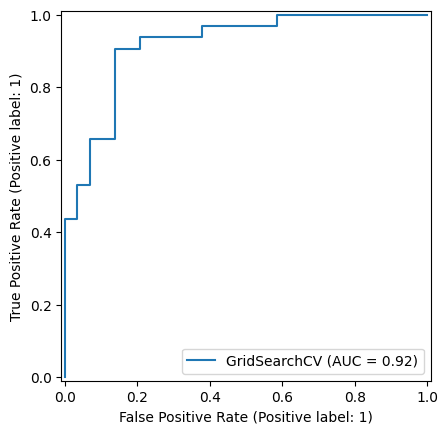

In [36]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log, X_test_transformed, y_test)
plt.show()

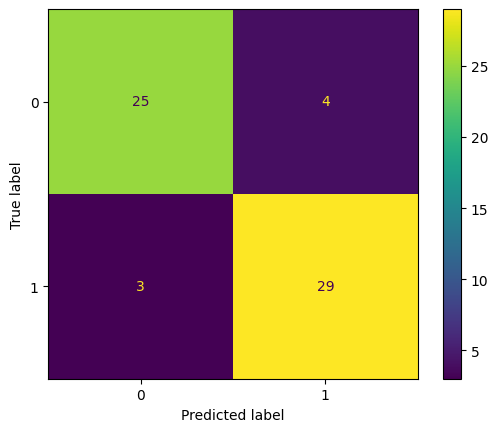

In [37]:
# Plot Confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_log, X_test_transformed, y_test);

In [38]:
# Print Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation metrics using cross-validation (cross_val_score)

In [39]:
# Check best hyperparameters
gs_log.best_params_

{'C': np.float64(0.01610262027560939),
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [40]:
# Create a new classifier with the best parameters
clf = gs_log.best_estimator_

In [41]:
### Standardize the whole data
scaler_all = StandardScaler()
X_transformed = scaler_all.fit_transform(X)
X_transformed

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]], shape=(303, 13))

In [42]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X_transformed, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8381420765027322)

In [43]:
# Cross-validated precision
cv_prec = cross_val_score(clf, X_transformed, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

np.float64(0.821001031991744)

In [44]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X_transformed, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9030303030303031)

In [45]:
# Cross-validaed f1-score
cv_f1 = cross_val_score(clf, X_transformed, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.859213149162458)

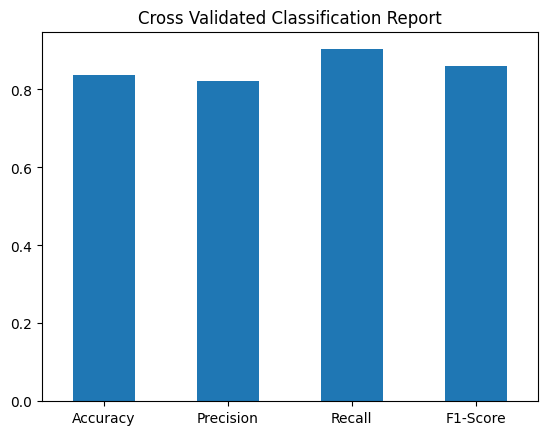

In [46]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1-Score": cv_f1
                          }, index=[0])
cv_metrics.T.plot(kind='bar', legend=False)
plt.title("Cross Validated Classification Report")
plt.xticks(rotation=0);

### Feature Importance 
It means: Which features contributed the most to the outcomes of the model and how did they contribute?

* Find the feaure importance for LogisticRegression Model.

In [47]:
# Fit the data to our final best logistic Regression model
clf.fit(X_train_transformed, y_train);

In [48]:
# Check Coefficients
clf.coef_

array([[-0.09618908, -0.24928182,  0.29208807, -0.0770986 , -0.03432837,
         0.01554241,  0.07183642,  0.20876639, -0.26740978, -0.27365838,
         0.19422556, -0.27981537, -0.2343119 ]])

In [49]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(-0.09618907820508762),
 'sex': np.float64(-0.24928182388266754),
 'cp': np.float64(0.29208806994492265),
 'trestbps': np.float64(-0.0770985963042629),
 'chol': np.float64(-0.03432836975066476),
 'fbs': np.float64(0.015542410725617064),
 'restecg': np.float64(0.07183641644458678),
 'thalach': np.float64(0.2087663935705303),
 'exang': np.float64(-0.2674097766801317),
 'oldpeak': np.float64(-0.273658380408778),
 'slope': np.float64(0.1942255616724663),
 'ca': np.float64(-0.279815371337279),
 'thal': np.float64(-0.23431190030920412)}

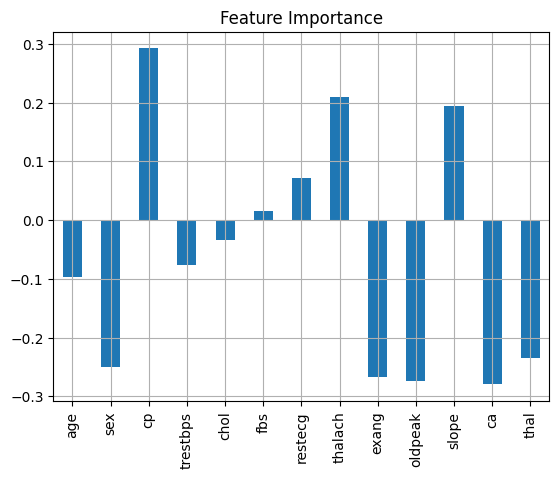

In [50]:
# Plot the bar graph of feature_dict for better visualization
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title="Feature Importance", legend=False, grid=True);

### Results after feature scaling:
* KNN Model showed great performance increase defeating both logisticRegression and RandomForestClassifier models with an accuracy score of 0.9180 after tuning the hyperparameters.
* The performance of LogisticRegression and RandomForestClassifier models remains the same.

### Tune the hyperparameters of KNN model using GridSearchCV

In [103]:
# Define Parameter Grid
knn_param_grid = {'leaf_size': np.arange(2,50,1),
                  'algorithm': ['kd_tree', 'brute','auto','ball_tree'],
                  'metric': ['minkowski', 'chebyshev', 'manhattan'],
                  'p': [2, 3, 4, 1],
                  'weights': ['distance','uniform']}

In [104]:
# Setup a random seed
np.random.seed(42)

# Define GridSearchCV based new estimator with best paramaters
gs_knn = GridSearchCV(estimator=knn,
                      param_grid=knn_param_grid,
                      cv=5,
                      n_jobs=-1,
                      verbose=True)

# Fit the data into new estimator
gs_knn.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


,estimator,KNeighborsCla..._neighbors=20)
,param_grid,"{'algorithm': ['kd_tree', 'brute', ...], 'leaf_size': array([ 2, 3..., 47, 48, 49]), 'metric': ['minkowski', 'chebyshev', ...], 'p': [2, 3, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,20


In [105]:
gs_knn.score(X_test_transformed, y_test)

0.8852459016393442

In [106]:
gs_knn.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': np.int64(2),
 'metric': 'minkowski',
 'p': 1,
 'weights': 'uniform'}

In [107]:
# Tune the Hyperparameters of K-Nearest Neighbour Classifier Model
# There is only parameter n-neighbors for KNN model to tune

# Define Lists to take training scores and test scores to compare at different parameters
train_scores = []
test_scores = []

# Define a range of values for n-neighbor parameter
neighbor = range(1,20)

# Setup KNN instance
knn_new = gs_knn.best_estimator_
# Use loop to get different scores at different n-neighbor value
for i in neighbor:
    # Tune the parameter
    knn_new.set_params(n_neighbors=i)

    # Fit the data to train the model
    knn_new.fit(X_train_transformed, y_train)
    
    # Append the train score
    train_scores.append(knn_new.score(X_train_transformed, y_train))

    # Append the test score
    test_scores.append(knn_new.score(X_test_transformed, y_test))

Maximum KNN Score on test data is 90.16% at n_neighbor value: 13


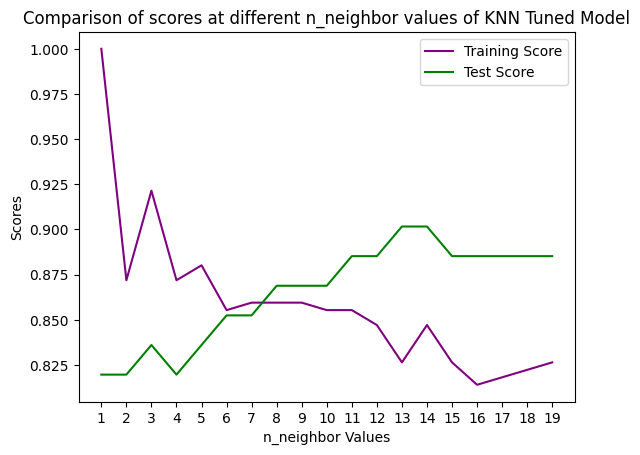

In [89]:
# Plot the scores against the same neighbor to find a neighbor value where model scored best
plt.title("Comparison of scores at different n_neighbor values of KNN Tuned Model")
plt.plot(neighbor, train_scores, label="Training Score", color='Purple')
plt.xticks(np.arange(1,20,1))
plt.plot(neighbor, test_scores, label="Test Score", color='Green')
plt.xlabel("n_neighbor Values")
plt.ylabel("Scores")
plt.legend()
print(f"Maximum KNN Score on test data is {max(test_scores)*100:.2f}% at n_neighbor value: {test_scores.index(max(test_scores))+1}")

In [112]:
# Set the best n_neighbors value to the model
knn_new.set_params(n_neighbors=13)

# Check the final score of the model
knn_new.score(X_test_transformed,y_test)

0.9016393442622951

### Evaluate tuned KNN Model, beyond accuracy using:
* ROC curve and AUC score 
* Confusion matrix 
* Classification report 
* Precision 
* Recall 
* F1-score 

In [ ]:
# Make predictions using tuned model (LogisticRegression)
y_preds = knn_new.predict(X_test_transformed)

In [ ]:
y_preds 

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

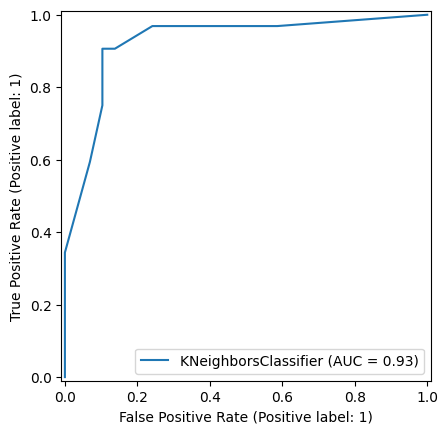

In [ ]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(knn_new, X_test_transformed, y_test)
plt.show()

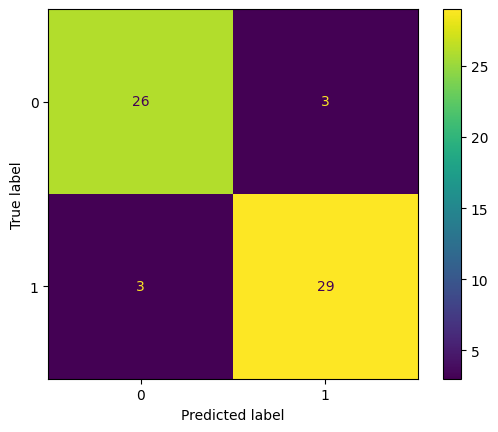

In [ ]:
# Plot Confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_new, X_test_transformed, y_test);

In [ ]:
# Print Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



### Calculate Evaluation metrics of KNN Model using cross-validation (cross_val_score)

In [119]:
# Check best hyperparameters
knn_new.get_params()

{'algorithm': 'kd_tree',
 'leaf_size': np.int64(2),
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'uniform'}

In [120]:
# Create a new classifier with the best parameters
clf = knn_new

In [121]:
### Standardize the whole data
scaler_all = StandardScaler()
X_transformed = scaler_all.fit_transform(X)
X_transformed

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]], shape=(303, 13))

In [139]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X_transformed, y, cv=7, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8384173965569313)

In [140]:
# Cross-validated precision
cv_prec = cross_val_score(clf, X_transformed, y, cv=7, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

np.float64(0.8228417188579965)

In [141]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X_transformed, y, cv=7, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9032091097308488)

In [142]:
# Cross-validaed f1-score
cv_f1 = cross_val_score(clf, X_transformed, y, cv=7, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8595538706480955)

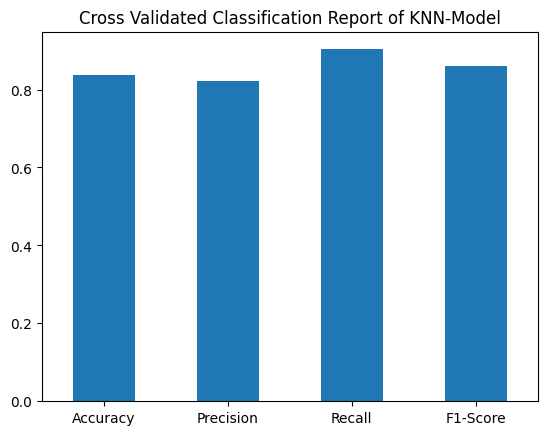

In [144]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1-Score": cv_f1
                          }, index=[0])
cv_metrics.T.plot(kind='bar', legend=False)
plt.title("Cross Validated Classification Report of KNN-Model")
plt.xticks(rotation=0);